# Previsão de Preços de Ações usando Redes Neurais Recorrentes (RNN) - Exemplo com ações da Apple (AAPL)

Neste Jupyter Notebook, vamos demonstrar como usar Redes Neurais Recorrentes (RNNs) para prever os preços de fechamento das ações da empresa Apple Inc. (AAPL) usando o histórico de preços. Vamos seguir os seguintes passos:

**Importar Bibliotecas**:
Vamos começar importando as bibliotecas necessárias para o desenvolvimento do modelo de previsão.

In [1]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


**Obter os Dados:**
Definimos o ticker da ação (AAPL) e as datas de início e fim para obter os dados históricos do Yahoo Finance. Em seguida, baixamos os dados dos preços de fechamento das ações.

In [2]:
ticker = "AAPL"
data_inicio = "2020-01-01"
data_fim = "2023-07-27"

dados = yf.download(ticker, start=data_inicio, end=data_fim)

precos = dados['Close'].values.reshape(-1, 1)


[*********************100%***********************]  1 of 1 completed


**Normalizar os Dados:**
Para melhorar o desempenho da rede neural, normalizamos os preços das ações entre 0 e 1 usando o MinMaxScaler.

In [3]:
normalizador = MinMaxScaler(feature_range=(0, 1))
precos_normalizados = normalizador.fit_transform(precos)


**Dividir os Dados em Treinamento e Teste:**
Separamos os dados normalizados em conjuntos de treinamento e teste. Vamos usar 80% dos dados para treinamento e o restante para teste.

In [4]:
tamanho_treinamento = int(len(precos_normalizados) * 0.8)
dados_treinamento = precos_normalizados[:tamanho_treinamento]
dados_teste = precos_normalizados[tamanho_treinamento:]


**Criar Sequências de Dados:**
Definimos uma função para criar sequências de dados com base no histórico. Cada sequência terá um determinado tamanho (sequencia_length) e o próximo valor após essa sequência será o alvo para a previsão.

In [8]:
def criar_sequencias(dados, sequencia_length):
    sequencias = []
    alvos = []
    for i in range(len(dados) - sequencia_length):
        sequencias.append(dados[i:i + sequencia_length])
        alvos.append(dados[i + sequencia_length])
    return np.array(sequencias), np.array(alvos)

sequencia_length = 2  # O tamanho da sequência histórica que usaremos para prever o próximo preço
num_features = 1  # Número de atributos para cada ponto de dados (apenas o preço de fechamento

X_treinamento, y_treinamento = criar_sequencias(dados_treinamento, sequencia_length)
X_teste, y_teste = criar_sequencias(dados_teste, sequencia_length)


**Criar e Treinar o Modelo RNN:**
Agora, vamos construir o modelo RNN usando o Keras. Usaremos uma camada LSTM com 50 neurônios, seguida por uma camada densa para a saída. Compilaremos o modelo usando o otimizador 'adam' e a métrica 'mean_squared_error'. Em seguida, treinaremos o modelo com os dados de treinamento.

In [9]:



modelo = Sequential()
modelo.add(LSTM(50, input_shape=(sequencia_length, num_features)))
modelo.add(Dense(1))

modelo.compile(optimizer='adam', loss='mean_squared_error')

modelo.fit(X_treinamento, y_treinamento, epochs=100, batch_size=16)


Epoch 1/100
45/45 [==============================] - 8s 4ms/step - loss: 0.1342
Epoch 2/100
45/45 [==============================] - 0s 4ms/step - loss: 0.0114
Epoch 3/100
45/45 [==============================] - 0s 4ms/step - loss: 0.0079
Epoch 4/100
45/45 [==============================] - 0s 4ms/step - loss: 0.0052
Epoch 5/100
45/45 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 6/100
45/45 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 7/100
45/45 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 8/100
45/45 [==============================] - 0s 4ms/step - loss: 7.9333e-04
Epoch 9/100
45/45 [==============================] - 0s 4ms/step - loss: 7.2741e-04
Epoch 10/100
45/45 [==============================] - 0s 4ms/step - loss: 7.0112e-04
Epoch 11/100
45/45 [==============================] - 0s 4ms/step - loss: 6.9184e-04
Epoch 12/100
45/45 [==============================] - 0s 4ms/step - loss: 6.9047e-04
Epoch 13/100
45/4

**Avaliar o Desempenho do Modelo:**
Para avaliar o desempenho do modelo, usaremos o erro médio quadrático (MSE) nas previsões em relação aos valores reais do conjunto de teste.

In [10]:
from sklearn.metrics import mean_squared_error

# Realizar as previsões no conjunto de teste
previsoes = modelo.predict(X_teste)

# Reverter a normalização para obter os preços reais
previsoes_reais = normalizador.inverse_transform(previsoes)
y_teste_reais = normalizador.inverse_transform(y_teste)

# Avaliar o erro médio quadrático (MSE)
erro_mse = mean_squared_error(y_teste_reais, previsoes_reais)
print("Erro MSE: ", erro_mse)


6/6 [==============================] - 0s 3ms/step
Erro MSE:  7.796425870255421


**Plotar os Resultados:**
Por fim, plotaremos os preços reais e as previsões do modelo para visualizar o desempenho.

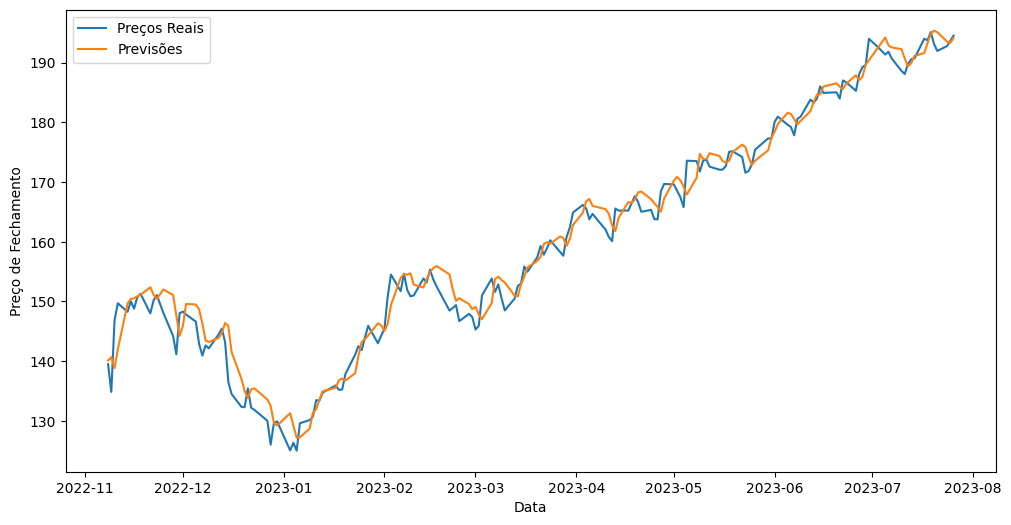

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(dados.index[tamanho_treinamento + sequencia_length:], y_teste_reais, label='Preços Reais')
plt.plot(dados.index[tamanho_treinamento + sequencia_length:], previsoes_reais, label='Previsões')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()
